## Question 1

(a) Load the dataset and construct a feature vector for each article in the entire dataset. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.

In [33]:
!pip install matplotlib
!pip install seaborn

zsh:1: command not found: pip
zsh:1: command not found: pip


In [34]:
!pip3 install matplotlib
!pip3 install seaborn

In [2]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()

In [36]:
# training data
data_train = pd.read_csv('train.csv')
matrix_train = vectorizer.fit_transform(data_train['Text'])
X = data_train.drop('Category', axis=1)
y = data_train['Category']

# have to separate training and testing data into 2 blocks due to vectorizer.get_feature_names_out() can only look at last matrix from the vectorizer.
X_bow = pd.DataFrame(data = matrix_train.toarray(), columns = vectorizer.get_feature_names_out())

grouped = X_bow.join(data_train['Category']).groupby('Category')

#(number of documents, number of features)
X_bow.shape

(428, 13518)

In [37]:
# testing data
data_test = pd.read_csv('test.csv')
matrix_test = vectorizer.transform(data_test['Text'])
X_test = data_test.drop('Category', axis=1)
y_test = data_test['Category']

X_test_bow = pd.DataFrame(data=matrix_test.toarray(), columns=vectorizer.get_feature_names_out())

In [38]:
#top 5
non_zero_cols = X_bow.loc[:4].sum() != 0
non_zero_cols = non_zero_cols[non_zero_cols].index.tolist()

top5 = X_bow[non_zero_cols]

top5.head()

,000,10,11,12,121,125,14,165,17,19,...,woven,writing,written,year,yearned,years,younger,youngsters,youthful,zooropa
0,1,0,0,0,0,0,2,0,0,0,...,1,1,0,0,0,1,2,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,1,0,0,1,0,1,...,0,0,1,2,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,1,2,0,0,1,1


<Axes: >

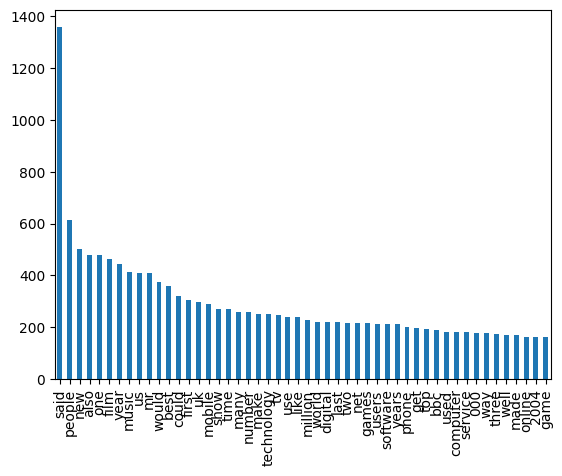

In [39]:
feature_sum = X_bow.sum(axis=0)
feature_sum = feature_sum.sort_values(ascending=False)
feature_sum = feature_sum.head(50)
feature_sum.plot.bar()
# vocab = vectorizer.vocabulary_
# #sorted_vocab =
# #top50 = list(sorted_vocab)[140:160]
# pd.DataFrame(vocab, columns=['Term', 'Index'])

## Bar plot of top 50 words

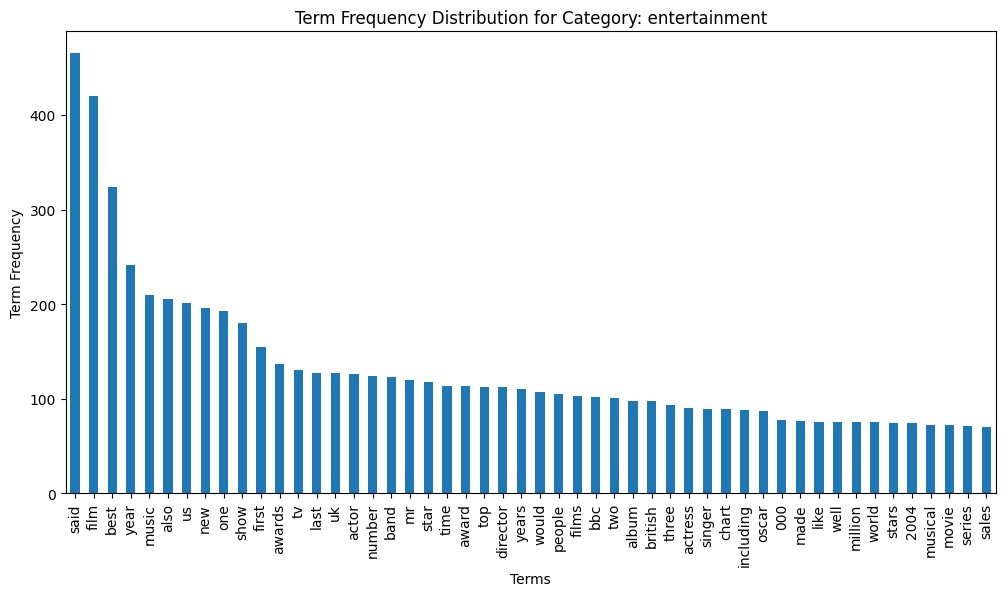

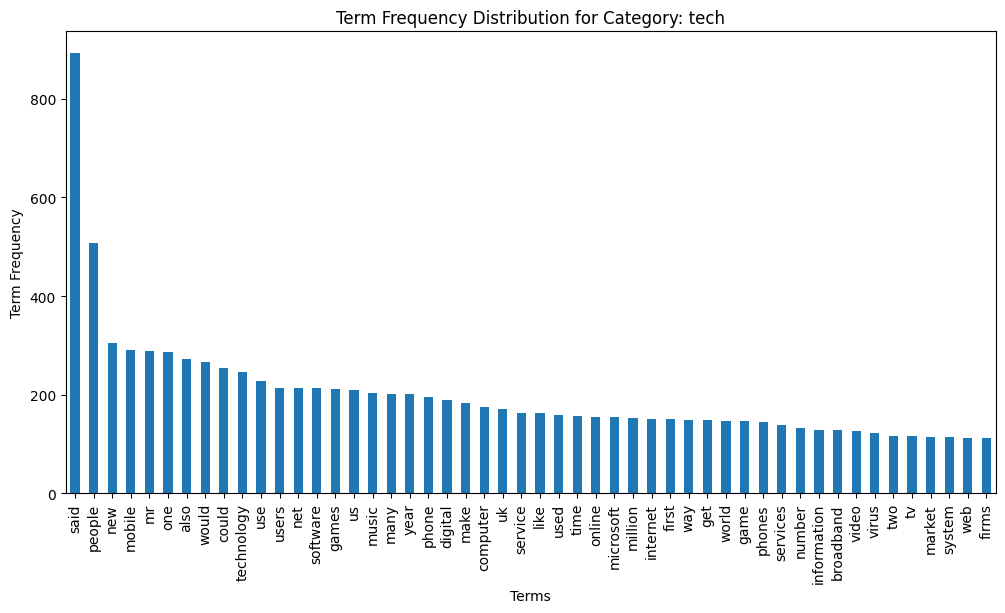

In [40]:
# Plot the term frequency distribution for each category
for category, group in grouped:
    plt.figure(figsize=(12, 6))
    term_freq = group.drop('Category', axis=1).sum(axis=0)  # Drop the 'Category' column
    term_freq = term_freq.sort_values(ascending=False)[:50]  # Sort the term frequencies
    term_freq.plot(kind='bar')
    plt.xlabel('Terms')
    plt.ylabel('Term Frequency')
    plt.title(f'Term Frequency Distribution for Category: {category}')
    plt.xticks(rotation=90)
    plt.show()


## Bar plot of top 100 words

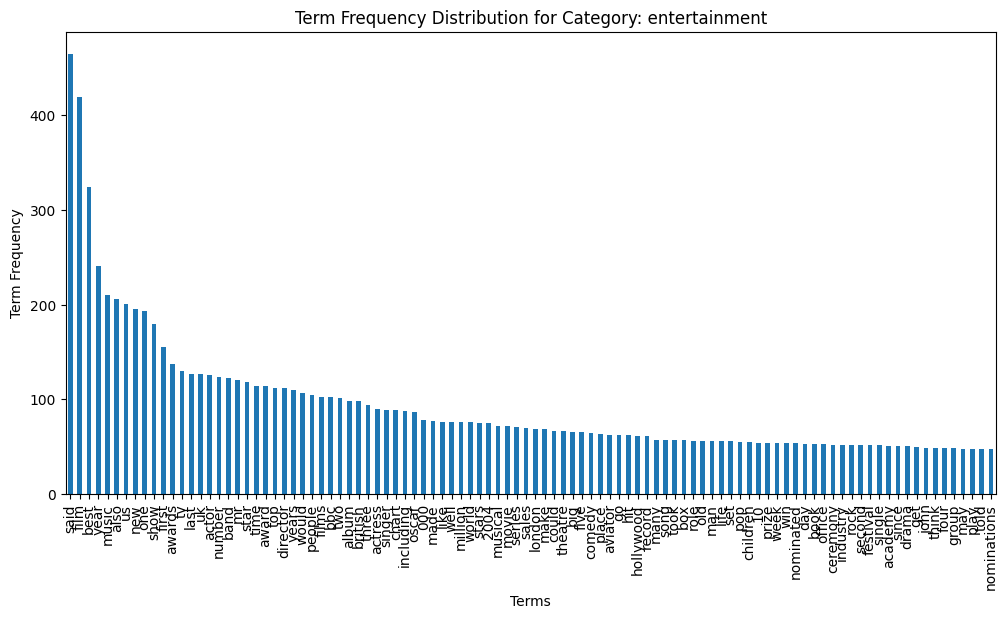

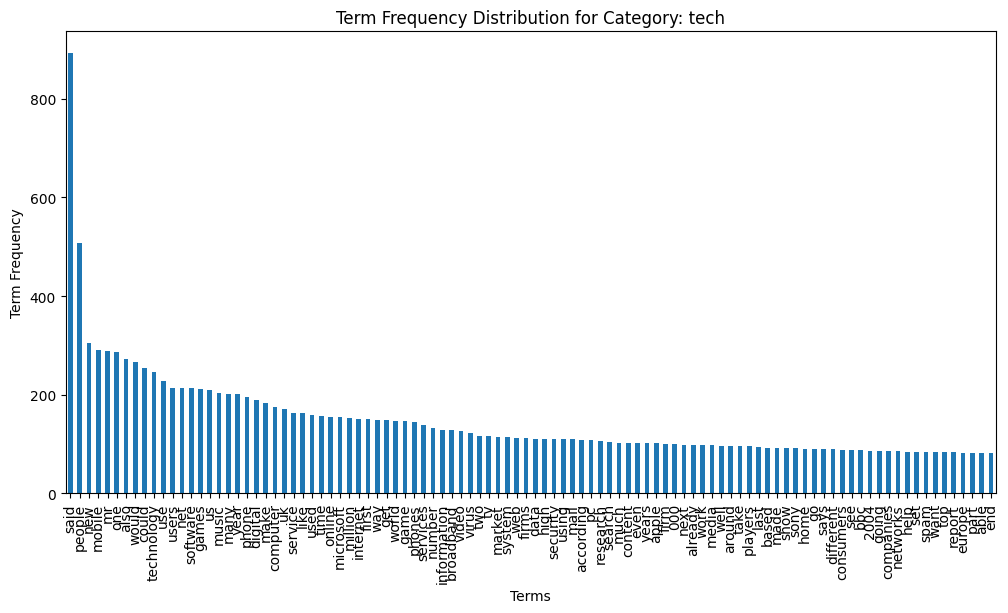

In [41]:
# Plot the term frequency distribution for each category
for category, group in grouped:
    plt.figure(figsize=(12, 6))
    term_freq = group.drop('Category', axis=1).sum(axis=0)  # Drop the 'Category' column
    term_freq = term_freq.sort_values(ascending=False)[:100]  # Sort the term frequencies
    term_freq.plot(kind='bar')
    plt.xlabel('Terms')
    plt.ylabel('Term Frequency')
    plt.title(f'Term Frequency Distribution for Category: {category}')
    plt.xticks(rotation=90)
    plt.show()


## Density Plot

/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/2833374837.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/2833374837.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)


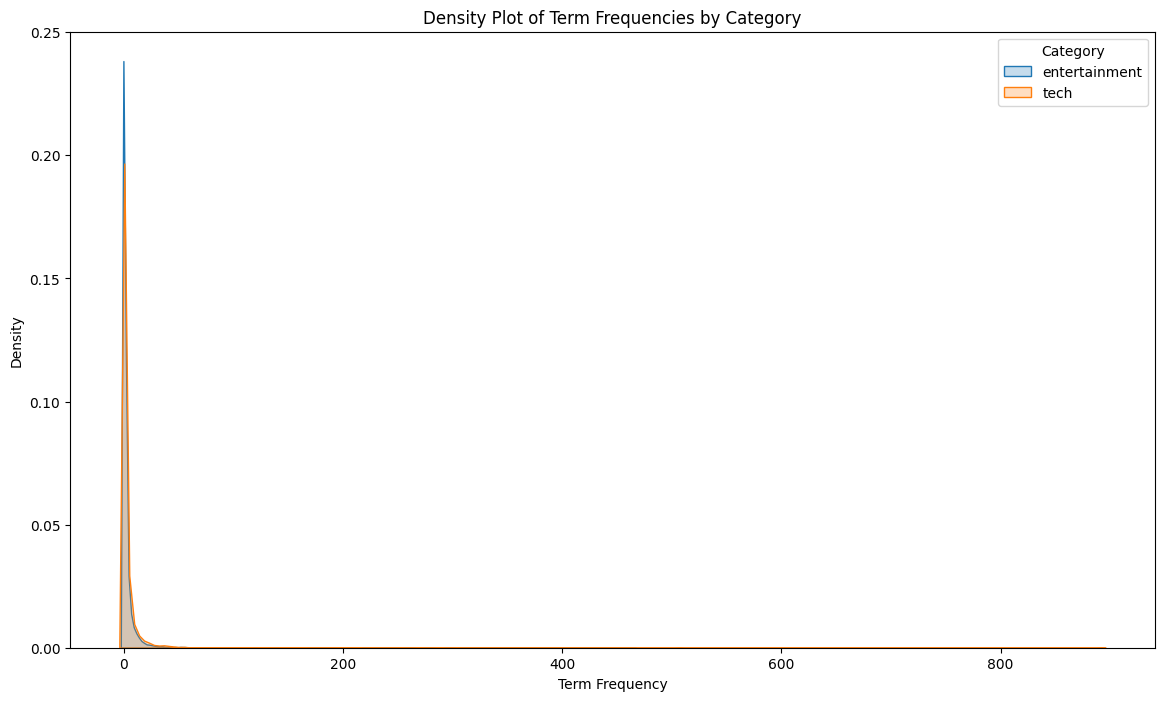

In [42]:
plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)

plt.xlabel('Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Term Frequencies by Category')
plt.legend(title='Category')

plt.show()

### Limiting the amount of data shown to 50

/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/1228652749.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/1228652749.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)


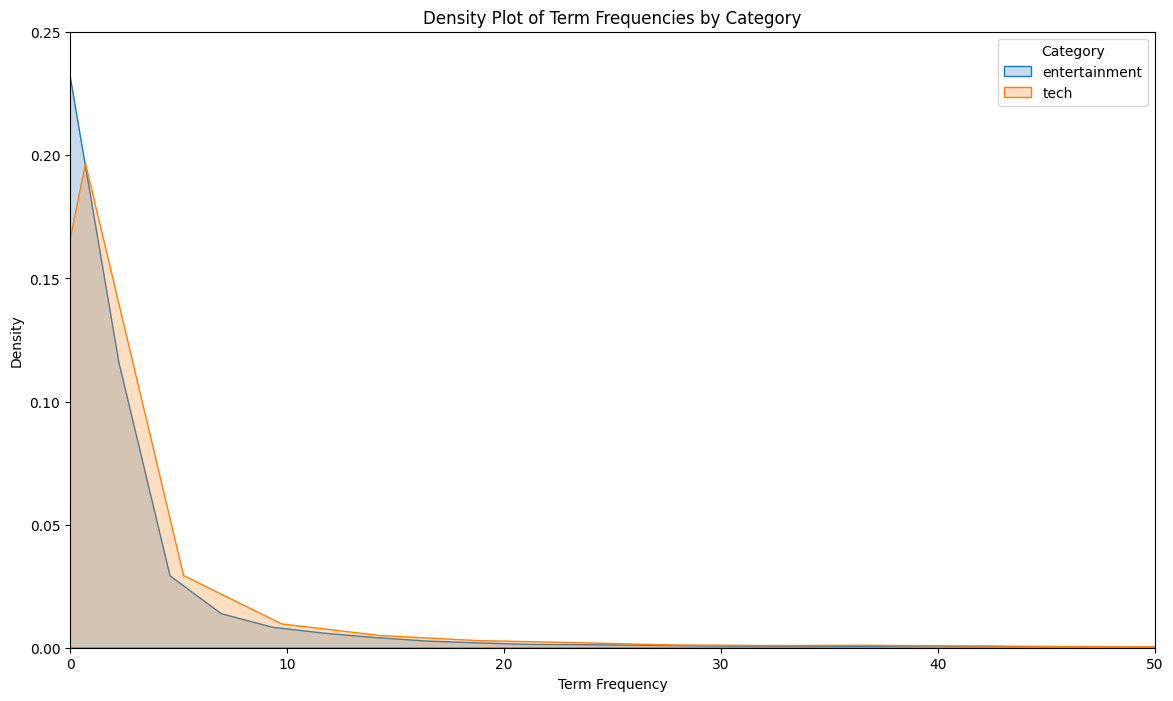

In [43]:
plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)

plt.xlabel('Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Term Frequencies by Category')
plt.legend(title='Category')
plt.xlim(0, 50)
plt.show()

### Using log to transform the data into a more readble format

/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/662267317.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(term_freq), shade=True, label=category)
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/662267317.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(term_freq), shade=True, label=category)


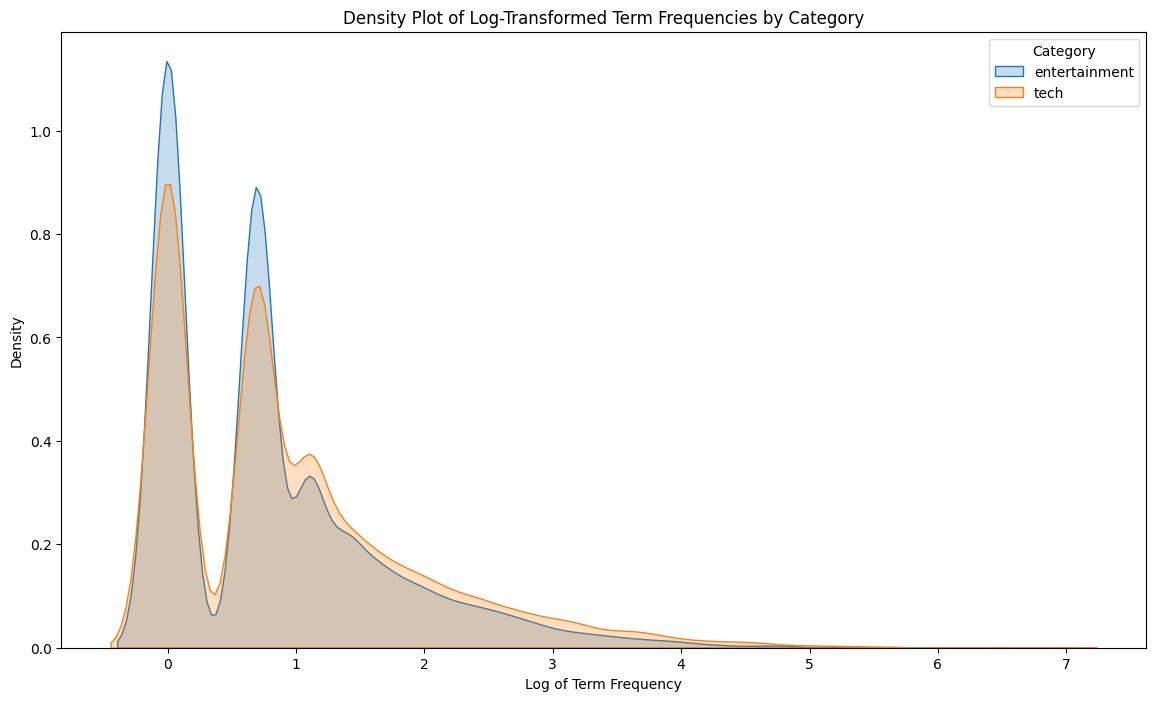

In [44]:
plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(np.log1p(term_freq), shade=True, label=category)

plt.xlabel('Log of Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Log-Transformed Term Frequencies by Category')
plt.legend(title='Category')
plt.show()

### Class Distribution

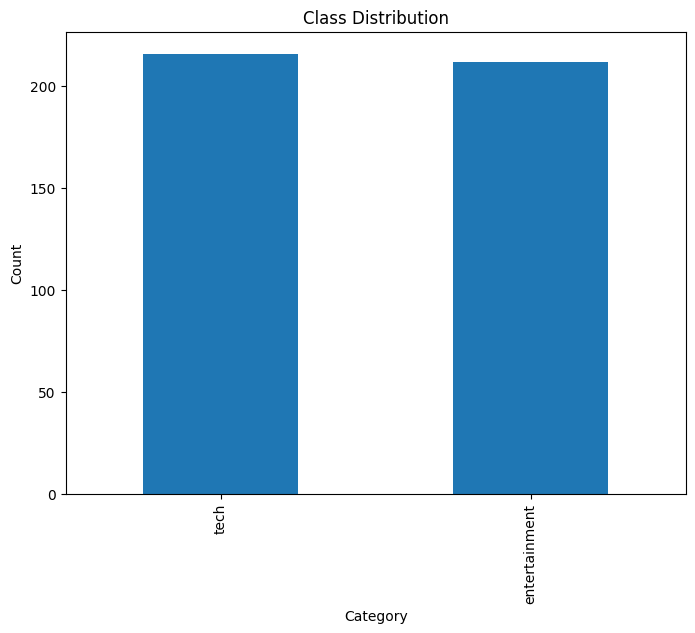

In [45]:
plt.figure(figsize=(8, 6))
data_train['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### 2a) NB. Train a Naive Bayes classifier using all articles features. 
Report the\
(i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier, and \
(ii) the top-20 words that maximize the following quantity: 
$$
\frac {P(X_w=1|Y=y)}{X_w=1|Y\ne y}
$$
Which list of words describe the two classes better? Briefly explain your reasoning

In [46]:
# Initialize the Naive Bayes classifier
classifier_nb = MultinomialNB()

# Initialize and apply the standard scaler to the features
# feature_scaler = StandardScaler()
# features_scaled = feature_scaler.fit_transform(tfidf_matrix.toarray())

# Train the classifier with the scaled features
classifier_nb.fit(X_bow, y)

# Access the log probabilities of features per class
log_probabilities = classifier_nb.feature_log_prob_

# Identify the top 20 most significant words for each class
for idx, label in enumerate(classifier_nb.classes_):
  indices_desc = np.argsort(log_probabilities[idx])[::-1]
  df = grouped.get_group(label).drop('Category', axis=1).sum(axis=0)
  significant_words = df[indices_desc][:20]
  print(f"Top 20 words for class {label}:\n{significant_words}")

Top 20 words for class entertainment:
said      465
film      420
best      324
year      241
music     210
also      206
us        201
new       196
one       193
show      180
first     155
awards    137
tv        130
last      127
uk        127
actor     126
number    124
band      123
mr        120
star      118
dtype: int64
Top 20 words for class tech:
said          892
people        507
new           304
mobile        290
mr            288
one           286
also          273
would         267
could         255
technology    247
use           228
users         214
net           214
software      213
games         212
us            210
music         203
many          202
year          201
phone         196
dtype: int64


/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/1355648868.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_words = df[indices_desc][:20]
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/1355648868.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_words = df[indices_desc][:20]


In [47]:
# Calculate and display the word ratios to find discriminative terms
word_ratios = np.exp(log_probabilities[1] - log_probabilities[0])
indices_ratios = np.argsort(word_ratios)[::-1]
words_with_top_ratios = X_bow.sum(axis=0)[indices_ratios][:20]
print("Top 20 words maximizing the ratio for class tech:\n", pd.Series(words_with_top_ratios.index))

word_ratios = np.exp(log_probabilities[0] - log_probabilities[1])
indices_ratios = np.argsort(word_ratios)[::-1]
words_with_top_ratios = X_bow.sum(axis=0)[indices_ratios][:20]
print("Top 20 words maximizing the ratio for class entertainment:\n", pd.Series(words_with_top_ratios.index))


Top 20 words maximizing the ratio for class tech:
 0            users
1         software
2        microsoft
3           mobile
4        broadband
5            virus
6            firms
7               pc
8             spam
9           phones
10          gadget
11             net
12        consumer
13         mobiles
14         gadgets
15         windows
16        machines
17    technologies
18         systems
19          device
dtype: object
Top 20 words maximizing the ratio for class entertainment:
 0         actress
1          singer
2           oscar
3           stars
4         aviator
5            band
6       nominated
7        festival
8            rock
9           album
10    nominations
11        charles
12          chart
13           foxx
14         oscars
15       starring
16        singles
17          jamie
18          swank
19         comedy
dtype: object


/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/2706652350.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  words_with_top_ratios = X_bow.sum(axis=0)[indices_ratios][:20]
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_30860/2706652350.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  words_with_top_ratios = X_bow.sum(axis=0)[indices_ratios][:20]


The second list of words should describe the two classes better. The reason is that the word being common itself doesn't mean it is a good indicator of the class. From the first list, we can see that lots of the words are common English words, their high frequency has nothing to do with the class. In contrast, the second list demonstrates not only the word's high frequency in that class but also its low frequency in the other class. This means the word is likely more unique to that class, so it better describes the two classes. In addition, from the words on the second list, we can see that they are closely related to the category using common sense.

#### 2b) kNN. Train a kNN classifier on the training dataset. 
You need to report the surface plot of your kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

##### Preprocessing for kNN & SVM

In [48]:
# dimension reduction to 2d
pca = PCA(n_components=2)

# fit and transform the training data
X_2d = pca.fit_transform(X_bow)
X_2d = pd.DataFrame({'Feature1': X_2d[:, 0], 'Feature2': X_2d[:, 1]})

# fit and transform the training data
X_test_2d = pca.fit_transform(X_test_bow)
X_test_2d = pd.DataFrame({'Feature1': X_test_2d[:, 0], 'Feature2': X_test_2d[:, 1]})

# convert y to number for plotting label's color
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [49]:
# dimension reduction to 2d with feature scaling
pca = PCA(n_components=2)
scaler = StandardScaler().set_output(transform="pandas")
X_bow_scaled = scaler.fit_transform(X_bow)

# fit and transform the training data
X_2d_scaled = pca.fit_transform(X_bow_scaled)
X_2d_scaled = pd.DataFrame({'Feature1': X_2d_scaled[:, 0], 'Feature2': X_2d_scaled[:, 1]})

# convert y to number for plotting label's color
le = LabelEncoder()
y_encoded = le.fit_transform(y)

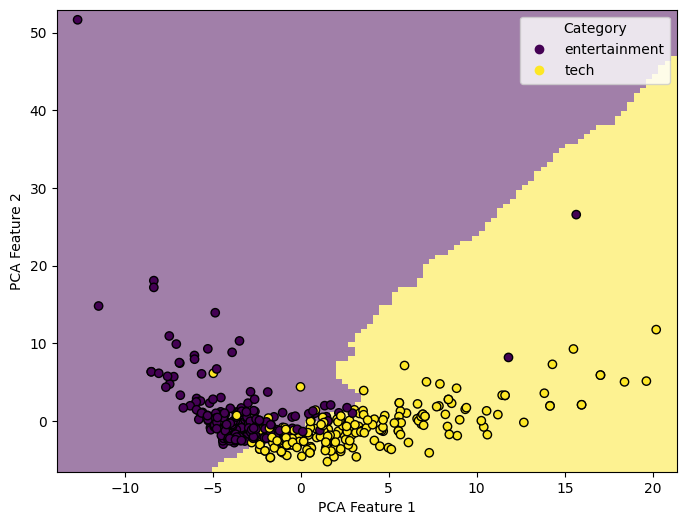

In [50]:
# fit KNN with Euclidean distance and k set to 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_2d, y)

# plot surface plot
fig, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    knn,
    X_2d,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="PCA Feature 1",
    ylabel="PCA Feature 2",
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_encoded, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    knn.classes_,
    loc="upper right",
    title="Category",
)

# display plot
plt.show()

The value of k can impact the smoothness of the decision decision boundary. If the k value is small, the decision boundary would look jagged and sensitive to outliers. As for the decision metric, Manhattan distance can make the boundary look brick like as it calculates the absolute difference between points.

#### 2c) SVM. Train two SVM classification models (soft-margin linear SVM and hard-margin RBF kernel SVM) on the training dataset. 
You need to report two surface plots for: \
(i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶𝐶), and \
(ii) the hard-margin RBF kernel with your choice of kernel width (σ). \
Explain the impact of penalty 𝐶𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries

(i) soft-margin linear SVM

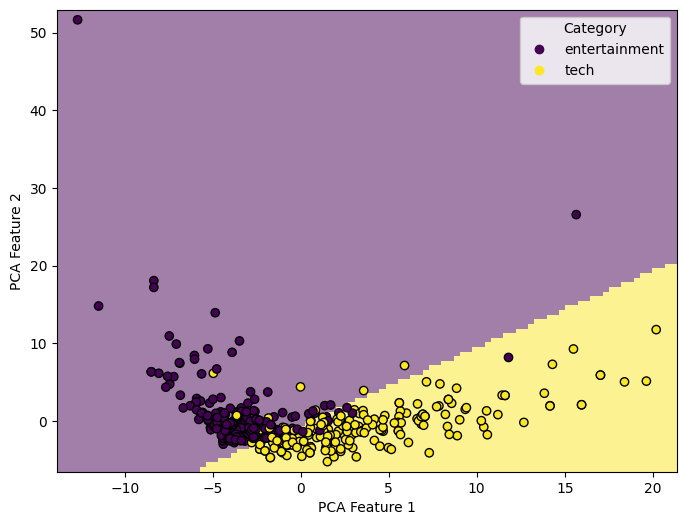

In [51]:
# Train the SVM model
svm_lsm = SVC(kernel='linear', C = 1)  # Linear Soft Margin model
svm_lsm.fit(X_2d, y)

# plot surface plot
fig, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    svm_lsm,
    X_2d,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="PCA Feature 1",
    ylabel="PCA Feature 2",
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_encoded, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    svm_lsm.classes_,
    loc="upper right",
    title="Category",
)

# display plot
plt.show()

(ii) hard-margin RBF kernel SVM

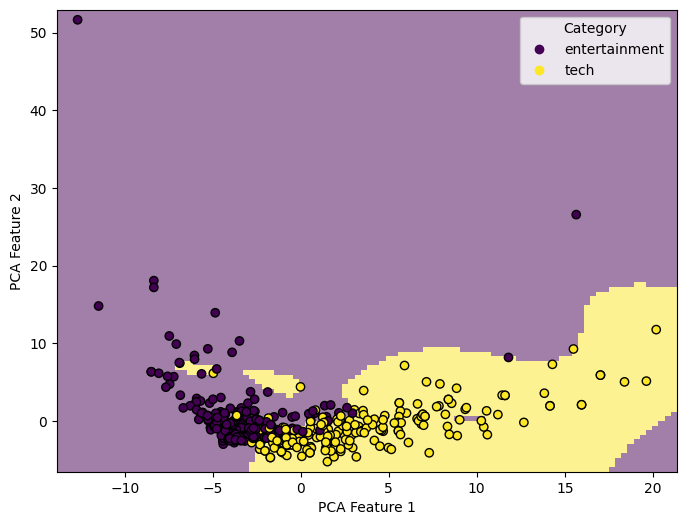

In [52]:
# @title
# Train the SVM model Rbf Hard Margin
svm_rhm = SVC(kernel='rbf', C=1e10, gamma = 1 / (2 * 5 ** 2)) # use a very big number for c to get the hard margin
svm_rhm.fit(X_2d, y)

# plot surface plot
fig, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    svm_rhm,
    X_2d,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="PCA Feature 1",
    ylabel="PCA Feature 2",
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_encoded, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    svm_rhm.classes_,
    loc="upper right",
    title="Category",
)

# display plot
plt.show()


#### 2d) NN. 
Consider a neural network with the following hyperparameters: \
the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.
- Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn] T , the hidden layer has x nodes z = [z1, ..., zx] T , and the output layer is a probability distribution y = [y1, y2]
T over two classes. 
- Plot the average training cross-entropy loss as shown below on the y-axis versus the
number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 

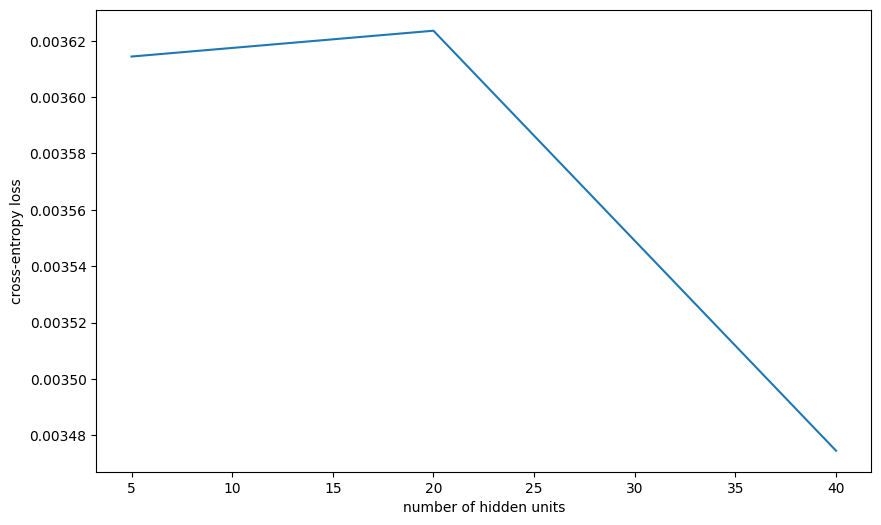

In [53]:
hidden_units = [5, 20, 40]
result_list = []
for val in hidden_units:
  nn = MLPClassifier(hidden_layer_sizes=val,  solver='sgd', learning_rate_init=0.01, max_iter=100)
  nn.fit(X_bow, y)
  y_prob = nn.predict_proba(X_bow)
  result_list.append(log_loss(y, y_prob))

plt.figure(figsize=(10, 6))
plt.plot(hidden_units, result_list)
plt.xlabel('number of hidden units')
plt.ylabel('cross-entropy loss')
plt.show()

#### 3a) We explore how the size of the training data set affects the test and train accuracy. 
For each value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). \
Please report two plots: 
(i) training and 
(ii) testing accuracy for each such value of m with the x-axis referring to m and the y-axis referring to the classification accuracy in 𝐹1 measure as shown below. \
In total, there should be four curves for training accuracy and four curves for testing accuracy. Explain the general trend of the two plots in terms of training and testing accuracy if any.

## 3a) NB

In [54]:
# calculate F1 for both trainning and testing on NB
def NB_split(X, y, splits):
  accuracy_train = []
  accuracy_test = []
  for split_val in splits:
    X_train, X_test, y_train_split, y_test_split = train_test_split(X, y, train_size=split_val, shuffle=False)
    # NB
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train_split)
    knn_trainset = pd.DataFrame(nb_classifier.predict(X_train), columns=['predicted'])
    knn_testset = pd.DataFrame(nb_classifier.predict(X_test_bow), columns=['predicted'])
    #training f1 score
    accuracy_train.append(f1_score(y_train_split, knn_trainset['predicted'], pos_label='entertainment'))
    #testing f1 score
    accuracy_test.append(f1_score(y_test, knn_testset['predicted'], pos_label='entertainment'))
  return accuracy_train, accuracy_test

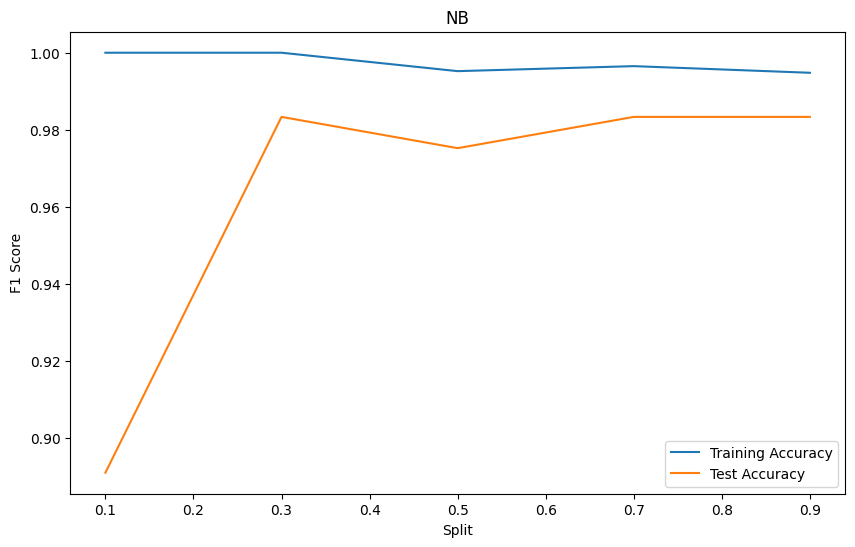

In [55]:
splits = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracy_train, accuracy_test = NB_split(X_bow, y, splits)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(splits, accuracy_train, label='Training Accuracy')
plt.plot(splits, accuracy_test,label='Test Accuracy')
plt.xlabel('Split')
plt.ylabel('F1 Score')
plt.title('NB')
plt.legend()
plt.show()

Training accuracy of Naive Bayes starts at 100%, and then started gradually decreasing at m value 0.3, showing a slight downward trend. Test accuracy first increases, reaching 0.98 at m value 0.3, then started decreasing till value m value 0.5. Both the training and the testing accuracy both peaked at m value 0.3 which suggests that the model started overfitting after m value 0.3

## 3a) kNN

In [56]:
# calculate F1 for both training and testing on kNN
def knn_split(X, y, splits):
  accuracy_train = []
  accuracy_test = []
  for split_val in splits:
    X_train, X_test, y_train_split, y_test_split = train_test_split(X, y, train_size=split_val, shuffle=False)
    # kNN
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train_split)
    knn_trainset = pd.DataFrame(knn.predict(X_train), columns=['predicted'])
    knn_testset = pd.DataFrame(knn.predict(X_test_bow), columns=['predicted'])
    #training f1 score
    accuracy_train.append(f1_score(y_train_split, knn_trainset['predicted'], pos_label='entertainment'))
    #testing f1 score
    accuracy_test.append(f1_score(y_test, knn_testset['predicted'], pos_label='entertainment'))
  return accuracy_train, accuracy_test

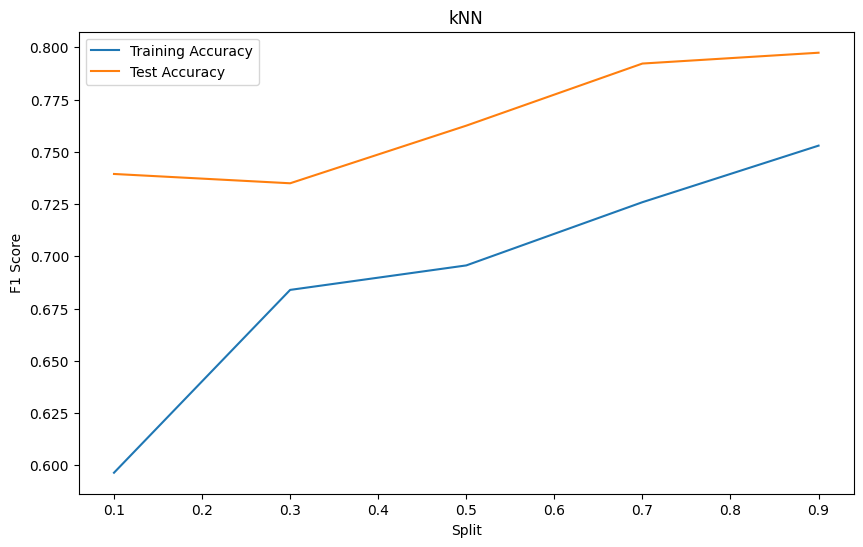

In [57]:
splits = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracy_train, accuracy_test = knn_split(X_bow, y, splits)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(splits, accuracy_train, label='Training Accuracy')
plt.plot(splits, accuracy_test,label='Test Accuracy')
plt.xlabel('Split')
plt.ylabel('F1 Score')
plt.title('kNN')
plt.legend()
plt.show()

Overall, both training and test accuracy are increasing as the value of m increases. Training accuracy plateaus around m value 0.5 as it only shows marginal increases as m value increases afterwards. Test accuracy is higher than training accuracy and also shows an increasing trend until m value reaches 0.7, then it decreases at m value 0.9. This suggests overfitting.

## soft-margin linear SVM

In [58]:
def svm_split_lsm(X, y, X_test, y_test, split, c):
    accuracy_train = []
    accuracy_test = []

    for m in split:
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = m)

        svm_model = SVC(kernel='linear', C = c)
        svm_model.fit(X_train, y_train)

        y_pred_train = svm_model.predict(X_train)
        y_pred_test = svm_model.predict(X_test)

        accuracy_train.append(f1_score(y_train, y_pred_train, pos_label='tech'))
        accuracy_test.append(f1_score(y_test, y_pred_test, pos_label='tech'))

    return accuracy_train, accuracy_test

c = 1
accuracy_train_lsm, accuracy_test_lsm = svm_split_lsm(X_2d, y, X_test_2d, y_test, splits, c)

#X_bow X_test_bow
#X_2d X_test_2d

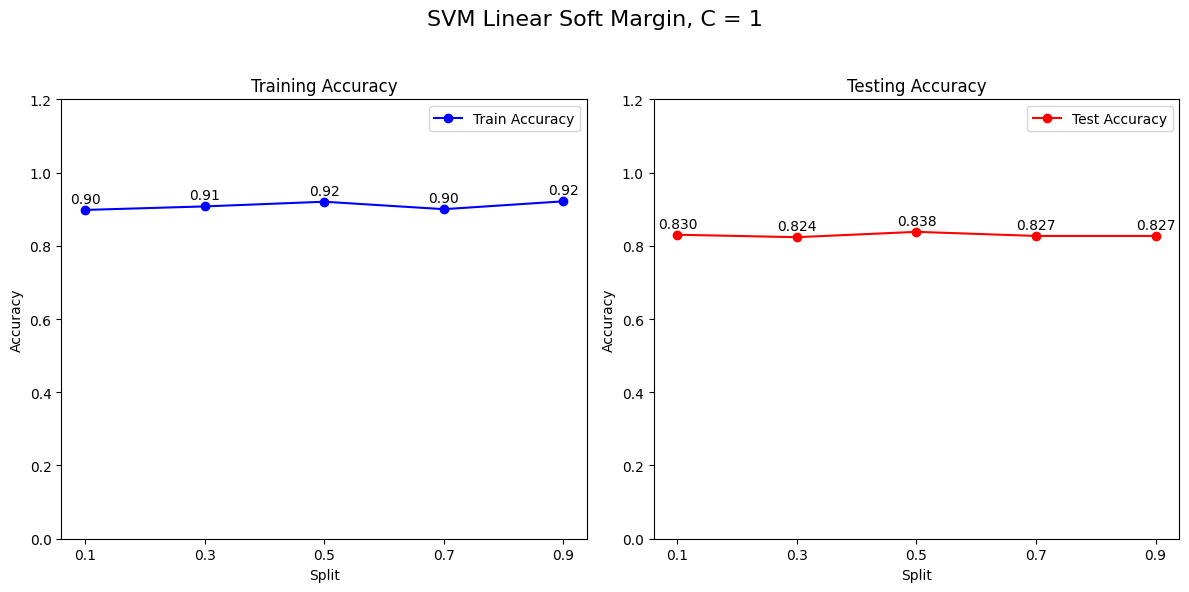

In [59]:
# visualise above two accuracy lists
def plt_svm_lsm(accuracy_train_lsm, accuracy_test_lsm):
  plt.figure(figsize=(12, 6))

  # plot for training accuracy
  plt.subplot(1, 2, 1)
  plt.plot(splits, accuracy_train_lsm, marker='o', linestyle='-', color='b', label='Train Accuracy')
  plt.xlabel('Split')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.xticks(splits, [f'{i}' for i in splits])
  plt.ylim(0, 1.2)
  plt.legend()
  for i, value in enumerate(accuracy_train_lsm):
    plt.annotate(f'{value:.2f}', (splits[i], value), textcoords="offset points", xytext=(0,5), ha='center')

  # plot for testing accuracy
  plt.subplot(1, 2, 2)
  plt.plot(splits, accuracy_test_lsm, marker='o', linestyle='-', color='r', label='Test Accuracy')
  plt.xlabel('Split')
  plt.ylabel('Accuracy')
  plt.title('Testing Accuracy')
  plt.xticks(splits, [f'{i}' for i in splits])
  plt.ylim(0, 1.2)
  plt.legend()
  for i, value in enumerate(accuracy_test_lsm):
    plt.annotate(f'{value:.3f}', (splits[i], value), textcoords="offset points", xytext=(0,5), ha='center')

  # add a title and display two charts
  plt.suptitle(f'SVM Linear Soft Margin, C = {c}', fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

plt_svm_lsm(accuracy_train_lsm, accuracy_test_lsm)

## 3a) RBF hard-margin linear SVM

In [60]:
def svm_split_rhm(X, y, X_test, y_test, split, c, sigma):
    accuracy_train = []
    accuracy_test = []

    for m in split:
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = m)

        svm_model = SVC(kernel='rbf', C=c, gamma = 1 / (2 * sigma ** 2))
        svm_model.fit(X_train, y_train)

        y_pred_train = svm_model.predict(X_train)
        y_pred_test = svm_model.predict(X_test)

        accuracy_train.append(f1_score(y_train, y_pred_train, pos_label='entertainment'))
        accuracy_test.append(f1_score(y_test, y_pred_test, pos_label='entertainment'))

    return accuracy_train, accuracy_test

c = 1e10
sigma = 9
accuracy_train_rhm, accuracy_test_rhm = svm_split_rhm(X_2d, y, X_test_2d, y_test, splits, c, sigma)

#X_bow X_test_bow
#X_2d X_test_2d

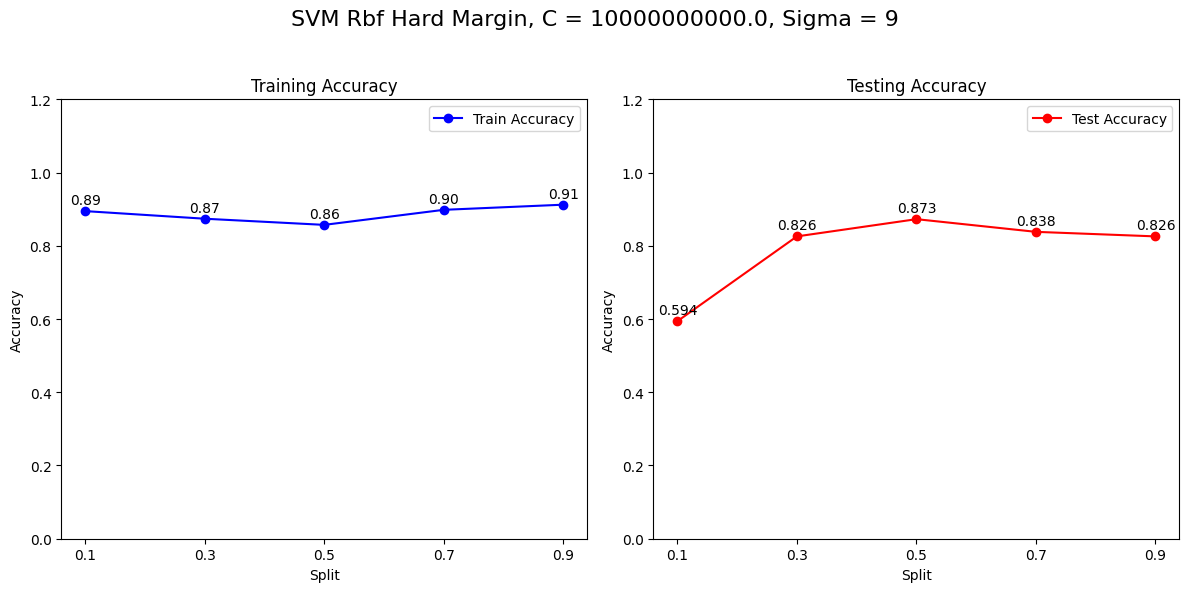

In [61]:
# visualise above two accuracy lists
def plt_svm_rhm(accuracy_train_rhm, accuracy_test_rhm):
  plt.figure(figsize=(12, 6))

  # plot for training accuracy
  plt.subplot(1, 2, 1)
  plt.plot(splits, accuracy_train_rhm, marker='o', linestyle='-', color='b', label='Train Accuracy')
  plt.xlabel('Split')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.xticks(splits, [f'{i}' for i in splits])
  plt.ylim(0, 1.2)
  plt.legend()
  for i, value in enumerate(accuracy_train_rhm):
    plt.annotate(f'{value:.2f}', (splits[i], value), textcoords="offset points", xytext=(0,5), ha='center')

  # plot for testing accuracy
  plt.subplot(1, 2, 2)
  plt.plot(splits, accuracy_test_rhm, marker='o', linestyle='-', color='r', label='Test Accuracy')
  plt.xlabel('Split')
  plt.ylabel('Accuracy')
  plt.title('Testing Accuracy')
  plt.xticks(splits, [f'{i}' for i in splits])
  plt.ylim(0, 1.2)
  plt.legend()
  for i, value in enumerate(accuracy_test_rhm):
    plt.annotate(f'{value:.3f}', (splits[i], value), textcoords="offset points", xytext=(0,5), ha='center')

  # add a title and display two charts
  plt.suptitle(f'SVM Rbf Hard Margin, C = {c}, Sigma = {sigma}', fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

plt_svm_rhm(accuracy_train_rhm, accuracy_test_rhm)

## 3a) NN

In [62]:
# calculate F1 for both trainning and testing on NN
def NN_split(X, y, splits):
  accuracy_train = []
  accuracy_test = []
  for split_val in splits:
    X_train, X_test, y_train_split, y_test_split = train_test_split(X, y, train_size=split_val)
    # NB
    nn_classifier = MLPClassifier(hidden_layer_sizes=val,  solver='sgd', learning_rate_init=0.01, max_iter=100)
    nn_classifier.fit(X_train, y_train_split)
    knn_trainset = pd.DataFrame(nn_classifier.predict(X_train), columns=['predicted'])
    knn_testset = pd.DataFrame(nn_classifier.predict(X_test_bow), columns=['predicted'])
    #training f1 score
    accuracy_train.append(f1_score(y_train_split, knn_trainset['predicted'], pos_label='entertainment'))
    #testing f1 score
    accuracy_test.append(f1_score(y_test, knn_testset['predicted'], pos_label='entertainment'))
  return accuracy_train, accuracy_test

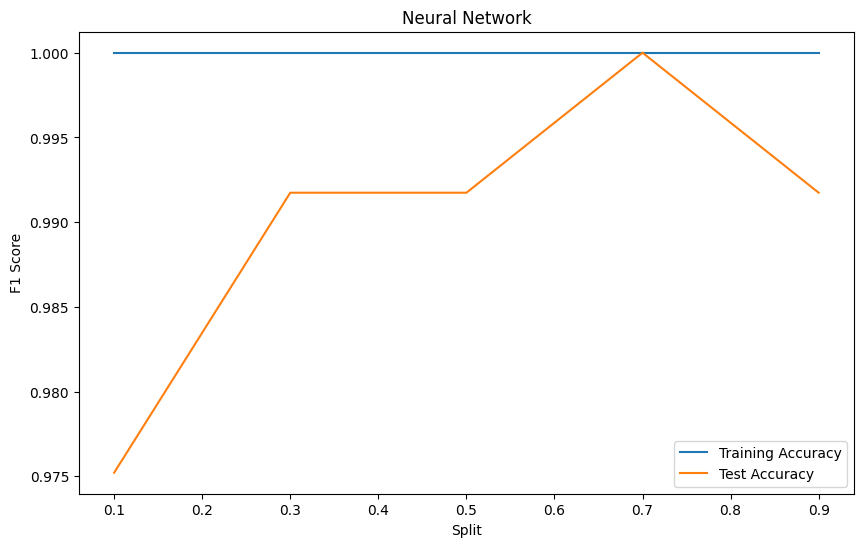

In [63]:
splits = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracy_train, accuracy_test = NN_split(X_bow, y, splits)
# plot results
plt.figure(figsize=(10, 6))
plt.plot(splits, accuracy_train, label='Training Accuracy')
plt.plot(splits, accuracy_test,label='Test Accuracy')
plt.xlabel('Split')
plt.ylabel('F1 Score')
plt.title('Neural Network')
plt.legend()
plt.show()

The training accuracy of Neural Network stays at 100% no matter the value of m. Test accuracy first experiences an increase with m value from 0.1 to 0.5. It then decreases at m value 0.7 and bounced back at m value 0.9.

## 3b) Let’s use 5-fold cross-validation to assess model performance. 
Investigate the impact of key hyperparameters of your choices for each classifier using a testing dataset. \
E.g., for SVM, the classification accuracy may be significantly affected by the kernels and hyperparameter combination. \
List hyperparameters for each classifier and demonstrate how these hyperparameters impact on the testing accuracy.

## 3b) NB

In [ ]:
nb_classifier_smoothing = MultinomialNB()
cv_score_smo = cross_val_score(nb_classifier_smoothing, X_bow, y_bin, cv=5, scoring='f1')
nb_classifier_no_smo = MultinomialNB(alpha=0, force_alpha=True)
cv_score_no_smo = cross_val_score(nb_classifier_no_smo, X_bow, y_bin, cv=5, scoring='f1')
print('smoothing:',  cv_score_smo.mean())
print('no smoothing:',  cv_score_no_smo.mean())

## 3b) kNN

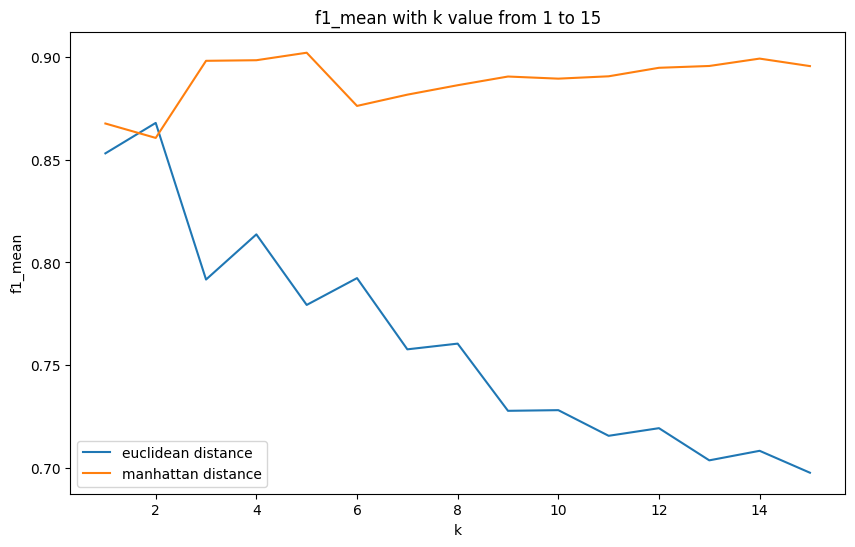

In [80]:
#binarize labels
y_bin = label_binarize(y, classes=['tech', 'entertainment']).flatten()
# knn cross validation
cv_mean_eu = []
for k in range(1, 16):
  knn_eu = KNeighborsClassifier(n_neighbors=k, p=2)
  cv_score = cross_val_score(knn_eu, X_bow, y_bin, cv=5, scoring='f1')
  cv_mean_eu.append(cv_score.mean())
knn_result_eu = pd.DataFrame({'k': list(range(1, 16)), 'f1_mean': cv_mean_eu})
plt.figure(figsize=(10, 6))
plt.plot(knn_result_eu['k'], knn_result_eu['f1_mean'], label='euclidean distance')
cv_mean_ma = []
for k in range(1, 16):
  knn_eu = KNeighborsClassifier(n_neighbors=k, p=1)
  cv_score = cross_val_score(knn_eu, X_2d, y_bin, cv=5, scoring='f1')
  cv_mean_ma.append(cv_score.mean())
knn_result_ma = pd.DataFrame({'k': list(range(1, 16)), 'f1_mean': cv_mean_ma})
plt.plot(knn_result_ma['k'], knn_result_ma['f1_mean'], label='manhattan distance')
plt.xlabel('k')
plt.ylabel('f1_mean')
plt.legend()
plt.title('f1_mean with k value from 1 to 15')
plt.show()

The hyperparameters of kNN are the k value and the distance metric. In the above code, we examined k value from 1 to 15 with euclidean distance and manhattan distance. From the above graph, we can easily see that manhattan distance is more suitable for this dataset it produces better F1 score than euclidean distance with almost all k values except k=3. In addition, the F1 score of euclidean distance decreases as k increases. In contrast, the F1 score of manhattan distance shows an increasing pattern with peak reached at k=5. In conclusion, the best hyperparameters are k=5 and manhattan distance.

## 3b) soft-margin linear SVM

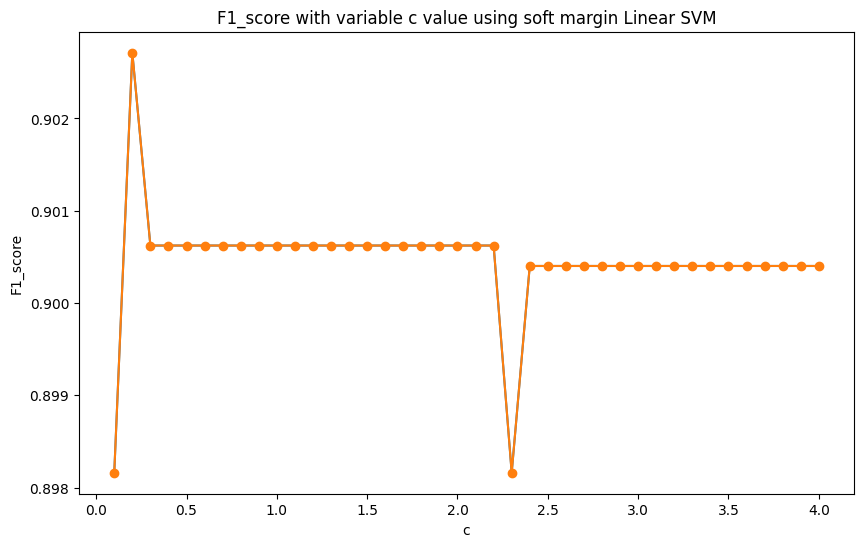

In [65]:
def svm_lsm_cv(x, y, c_range):
  svm_lsm_cv_f1 = []
  for c in c_range:
    svm_lsm = SVC(kernel='linear', C = c)
    cv_score = cross_val_score(svm_lsm, x, y, cv=5, scoring='f1')
    svm_lsm_cv_f1.append(cv_score.mean())
  return svm_lsm_cv_f1

c_range = [round(i*0.1, 1) for i in range(1, 41)]
svm_lsm_cv_f1 = svm_lsm_cv(X_2d, y_bin, c_range)

svm_lsm_cv_df = pd.DataFrame({'c': c_range, 'F1_score': svm_lsm_cv_f1})

plt.figure(figsize=(10, 6))
plt.plot(svm_lsm_cv_df['c'], svm_lsm_cv_df['F1_score'])
plt.xlabel('c')
plt.ylabel('F1_score')
plt.title('F1_score with variable c value using soft margin Linear SVM')

plt.plot(svm_lsm_cv_df['c'], svm_lsm_cv_df['F1_score'], marker='o', linestyle='-')

plt.show()

#X_bow X_test_bow
#X_2d X_test_2d

## 3b) RBF hard-margin linear SVM

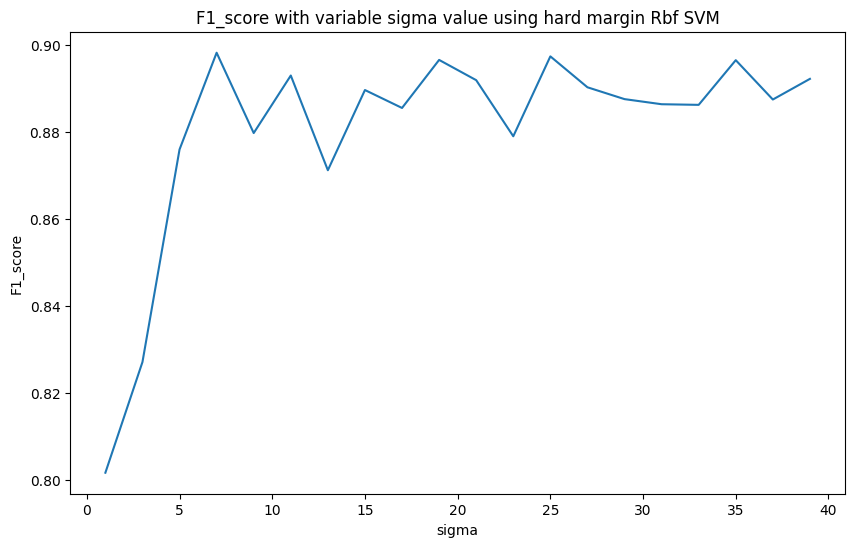

In [66]:
def svm_rhm_cv(x, y, c, sigma_range):
  svm_rhm_cv_f1 = []
  for sigma in sigma_range:
    svm_rhm = SVC(kernel='rbf', C=c, gamma = 1 / (2 * sigma ** 2))
    cv_score = cross_val_score(svm_rhm, x, y, cv=5, scoring='f1')
    svm_rhm_cv_f1.append(cv_score.mean())
  return svm_rhm_cv_f1

sigma_range = [round(1+i*2, 0) for i in range(0,20)]
c = 1e10
svm_rhm_cv_f1 = svm_rhm_cv(X_2d, y_bin, c, sigma_range)

svm_rhm_cv_df = pd.DataFrame({'sigma': sigma_range, 'F1_score': svm_rhm_cv_f1})

plt.figure(figsize=(10, 6))
plt.plot(svm_rhm_cv_df['sigma'], svm_rhm_cv_df['F1_score'])
plt.xlabel('sigma')
plt.ylabel('F1_score')
plt.title('F1_score with variable sigma value using hard margin Rbf SVM')

plt.show()

#X_bow X_test_bow
#X_2d X_test_2d

## 3b) NN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (

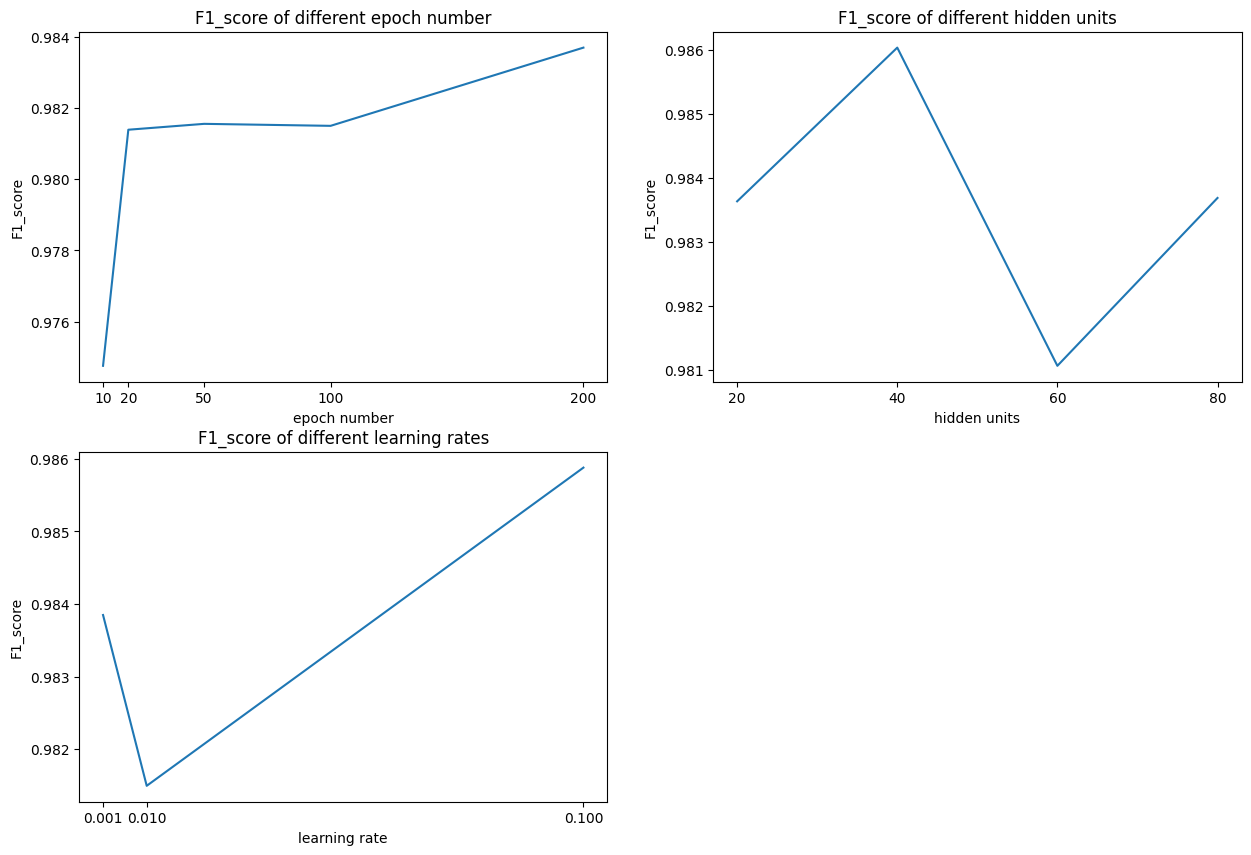

In [67]:
epochs_no = [10, 20, 50, 100, 200]
hidden_units = [20, 40, 60, 80]
learning_rate = [0.1, 0.01, 0.001]
cv_mean_nn_epoch = []
cv_mean_nn_hidden_unit = []
cv_mean_nn_lr = []

# tune epochs number
for epoch in epochs_no:
    nn = MLPClassifier(hidden_layer_sizes=20,  solver='sgd', learning_rate_init=0.01, max_iter=epoch)
    cv_score = cross_val_score(nn, X_bow, y_bin, cv=5, scoring='f1')
    cv_mean_nn_epoch.append(cv_score.mean())

# tune hidden units number
for unit in hidden_units:
    nn = MLPClassifier(hidden_layer_sizes=unit,  solver='sgd', learning_rate_init=0.01, max_iter=100)
    cv_score = cross_val_score(nn, X_bow, y_bin, cv=5, scoring='f1')
    cv_mean_nn_hidden_unit.append(cv_score.mean())

# tune learning rate
for rate in learning_rate:
    nn = MLPClassifier(hidden_layer_sizes=20,  solver='sgd', learning_rate_init=rate, max_iter=100)
    cv_score = cross_val_score(nn, X_bow, y_bin, cv=5, scoring='f1')
    cv_mean_nn_lr.append(cv_score.mean())

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_no, cv_mean_nn_epoch)
plt.xlabel('epoch number')
plt.ylabel('F1_score')
plt.xticks(epochs_no)
plt.title('F1_score of different epoch number')

plt.subplot(2, 2, 2)
plt.plot(hidden_units, cv_mean_nn_hidden_unit)
plt.xlabel('hidden units')
plt.ylabel('F1_score')
plt.xticks(hidden_units)
plt.title('F1_score of different hidden units')

plt.subplot(2, 2, 3)
plt.plot(learning_rate, cv_mean_nn_lr)
plt.xlabel('learning rate')
plt.ylabel('F1_score')
plt.xticks(learning_rate)
plt.title('F1_score of different learning rates')

plt.show()



The three hyperparameters for Neural Network are the number of epoches, the number of hidden units and the learning rate. From the above diagrams, we can see that F1 score increases as the number of epoches increases. However, there are some slight decreases at 50 epoches. As for hidden unit, F1 score increases as the number of hidden units increases. However, it suffered a slight decrease at 60 hidden units and bounced back at 80 hidden units. As for learning rate, F1 score also increases as learning rate increases. It is worth noting that the increase was marginal from 0.01 to 0.1. In conclusion, the best hyperparameters are 200 epoches, 80 hidden units and learning rate of 0.1.

## 3c) Report and compare your NB, kNN, SVM and NN classifiers with the best hyperparameter settings. 
Summarize what you have observed in the classification accuracy in 𝐹1 measure on the testing dataset.

In [3]:
vectorizer = CountVectorizer()

# training data
data_train = pd.read_csv('train.csv')
matrix_train = vectorizer.fit_transform(data_train['Text'])
X = data_train.drop('Category', axis=1)
y = data_train['Category']

# have to separate training and testing data into 2 blocks due to vectorizer.get_feature_names_out() can only look at last matrix from the vectorizer.
X_bow = pd.DataFrame(data = matrix_train.toarray(), columns = vectorizer.get_feature_names_out())

grouped = X_bow.join(data_train['Category']).groupby('Category')

#(number of documents, number of features)
X_bow.shape

# testing data
data_test = pd.read_csv('test.csv')
matrix_test = vectorizer.transform(data_test['Text'])
X_test = data_test.drop('Category', axis=1)
y_test = data_test['Category']

X_test_bow = pd.DataFrame(data=matrix_test.toarray(), columns=vectorizer.get_feature_names_out())

In [4]:
# Train Naive Bayes on the entire dataset and return accuracy value
nb_classifier = MultinomialNB()
nb_classifier.fit(X_bow, y)

# Predictions
y_train_pred_nb = nb_classifier.predict(X_bow)
y_test_pred_nb = nb_classifier.predict(X_test_bow)

# Calculate F1 scores for NB
f1_train_nb = f1_score(y, y_train_pred_nb, average='macro')
f1_test_nb = f1_score(y_test, y_test_pred_nb, average='macro')  

# Print the F1 scores for NB
print(f"NB Training F1 Score (entire dataset): {f1_train_nb}")
print(f"NB Testing F1 Score (entire dataset): {f1_test_nb}")

NB Training F1 Score (entire dataset): 0.9953266946191475
NB Testing F1 Score (entire dataset): 0.9712659257251288


In [5]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_bow, y)

# Predictions for KNN
y_train_pred_knn = knn.predict(X_bow)
y_test_pred_knn = knn.predict(X_test_bow)

# Calculate F1 scores for KNN
f1_train_knn = f1_score(y, y_train_pred_knn, average='macro') 
f1_test_knn = f1_score(y_test, y_test_pred_knn, average='macro') 

# Print the F1 scores for KNN
print(f"KNN Training F1 Score: {f1_train_knn}")
print(f"KNN Testing F1 Score: {f1_test_knn}")

KNN Training F1 Score: 0.7835177512943357
KNN Testing F1 Score: 0.6040747028862479


In [6]:
# Train the SVM classifier on the entire training dataset with the optimal C value
svm_best = SVC(kernel='linear', C=0.2)
svm_best.fit(X_bow, y)

# Predictions for training and testing sets
y_train_pred_svm = svm_best.predict(X_bow)
y_test_pred_svm = svm_best.predict(X_test_bow)

# Calculate F1 scores
f1_train_svm = f1_score(y, y_train_pred_svm, average='macro')
f1_test_svm = f1_score(y_test, y_test_pred_svm, average='macro')

# Print the F1 scores
print(f"SVM Training F1 Score: {f1_train_svm}")
print(f"SVM Testing F1 Score: {f1_test_svm}")

SVM Training F1 Score: 1.0
SVM Testing F1 Score: 1.0


In [7]:
# Train the SVM classifier on the entire training dataset with the optimal parameters
svm_best_rbf = SVC(kernel='rbf', C=1e10, gamma=1/(2*20**2))
svm_best_rbf.fit(X_bow, y)

# Predictions for training and testing sets
y_train_pred_svm_rbf = svm_best_rbf.predict(X_bow)
y_test_pred_svm_rbf = svm_best_rbf.predict(X_test_bow)

# Calculate F1 scores
f1_train_svm_rbf = f1_score(y, y_train_pred_svm_rbf, average='macro')
f1_test_svm_rbf = f1_score(y_test, y_test_pred_svm_rbf, average='macro')

# Print the F1 scores
print(f"SVM RBF Training F1 Score: {f1_train_svm_rbf}")
print(f"SVM RBF Testing F1 Score: {f1_test_svm_rbf}")

SVM RBF Training F1 Score: 1.0
SVM RBF Testing F1 Score: 0.9903732631005359


In [8]:
y_test_bin = y_test.apply(lambda x: 1 if x == 'entertainment' else 0)

# Train the final neural network model with the optimal hyperparameters
best_nn = MLPClassifier(hidden_layer_sizes=(40), solver='sgd', learning_rate_init=0.1, max_iter=200, shuffle=False)
best_nn.fit(X_bow, y_bin)

# Predictions for training and testing sets
y_train_pred_nn = best_nn.predict(X_bow)
y_test_pred_nn = best_nn.predict(X_test_bow)

# Calculate F1 scores
f1_train_nn = f1_score(y_bin, y_train_pred_nn)
f1_test_nn = f1_score(y_test_bin, y_test_pred_nn)

# Print the F1 scores
print(f"Neural Network Training F1 Score: {f1_train_nn}")
print(f"Neural Network Testing F1 Score: {f1_test_nn}")

NameError: name 'y_bin' is not defined